**Cluster step by step**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D



In [2]:
# 1. Cargar y preparar los datos
# Creamos datos de ejemplo para el caso de marketing
# En un caso real, esto sería: data = pd.read_csv("datos_clientes.csv")
np.random.seed(42)
n_samples = 500

# Simulamos variables típicas de marketing
edad = np.random.normal(40, 10, n_samples)
ingreso_anual = np.random.normal(50000, 15000, n_samples)
gasto_mensual = np.random.normal(500, 200, n_samples)
frecuencia_compra = np.random.poisson(3, n_samples)
antiguedad_cliente = np.random.gamma(2, 2, n_samples)

# Creamos DataFrame
data = pd.DataFrame({
    'Edad': edad,
    'Ingreso_Anual': ingreso_anual,
    'Gasto_Mensual': gasto_mensual,
    'Frecuencia_Compra': frecuencia_compra,
    'Antiguedad_Cliente': antiguedad_cliente
})

# Mostrar estadísticas descriptivas
print("Estadísticas descriptivas de los datos:")
print(data.describe())



Estadísticas descriptivas de los datos:
             Edad  Ingreso_Anual  Gasto_Mensual  Frecuencia_Compra  \
count  500.000000     500.000000     500.000000         500.000000   
mean    40.068380   50477.391756     521.696906           2.996000   
std      9.812532   14669.957928     202.049269           1.691658   
min      7.587327    9546.700356     -79.251076           0.000000   
25%     32.996926   41070.623902     379.514076           2.000000   
50%     40.127971   50427.973993     523.961170           3.000000   
75%     46.367833   59768.634463     650.947673           4.000000   
max     78.527315   89485.730973    1020.336623           9.000000   

       Antiguedad_Cliente  
count          500.000000  
mean             4.156444  
std              2.979333  
min              0.051721  
25%              1.960064  
50%              3.452497  
75%              5.513021  
max             20.675863  


1. ¿Qué tipo de clientes imaginas con edad promedio de 40 años y gasto mensual de $500?

¿Qué variable crees que podría tener mayor relación con la frecuencia de compra? ¿Por qué?

In [4]:
# 2. Preprocesamiento de datos: Escalado
# Escalar es crucial para K-means ya que es sensible a las diferentes escalas
print("\nPaso 1: Preprocesamiento - Escalado de datos")
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled_df = pd.DataFrame(data_scaled, columns=data.columns)

print("Datos después del escalado:")
print(data_scaled_df.describe())



Paso 1: Preprocesamiento - Escalado de datos
Datos después del escalado:
               Edad  Ingreso_Anual  Gasto_Mensual  Frecuencia_Compra  \
count  5.000000e+02   5.000000e+02   5.000000e+02       5.000000e+02   
mean  -1.136868e-16   8.526513e-17   1.669775e-16      -1.776357e-17   
std    1.001002e+00   1.001002e+00   1.001002e+00       1.001002e+00   
min   -3.313475e+00  -2.792897e+00  -2.977243e+00      -1.772817e+00   
25%   -7.213771e-01  -6.418688e-01  -7.044085e-01      -5.893611e-01   
50%    6.079083e-03  -3.372011e-03   1.121772e-02       2.366912e-03   
75%    6.426233e-01   6.339860e-01   6.403399e-01       5.940949e-01   
max    3.923294e+00   2.661726e+00   2.470383e+00       3.552735e+00   

       Antiguedad_Cliente  
count        5.000000e+02  
mean         1.918465e-16  
std          1.001002e+00  
min         -1.379112e+00  
25%         -7.379434e-01  
50%         -2.365131e-01  
75%          4.557854e-01  
max          5.550224e+00  


2. ¿Qué pasaría si no escalamos los datos? Prueba desactivando esa línea del código y observa.


Paso 2: Determinación del número óptimo de clusters (K)
Aplicando el método del codo (Elbow Method)...
K = 2, Coeficiente de silueta = 0.1493
K = 3, Coeficiente de silueta = 0.1629
K = 4, Coeficiente de silueta = 0.1572
K = 5, Coeficiente de silueta = 0.1617
K = 6, Coeficiente de silueta = 0.1543
K = 7, Coeficiente de silueta = 0.1582
K = 8, Coeficiente de silueta = 0.1527
K = 9, Coeficiente de silueta = 0.1707
K = 10, Coeficiente de silueta = 0.1615


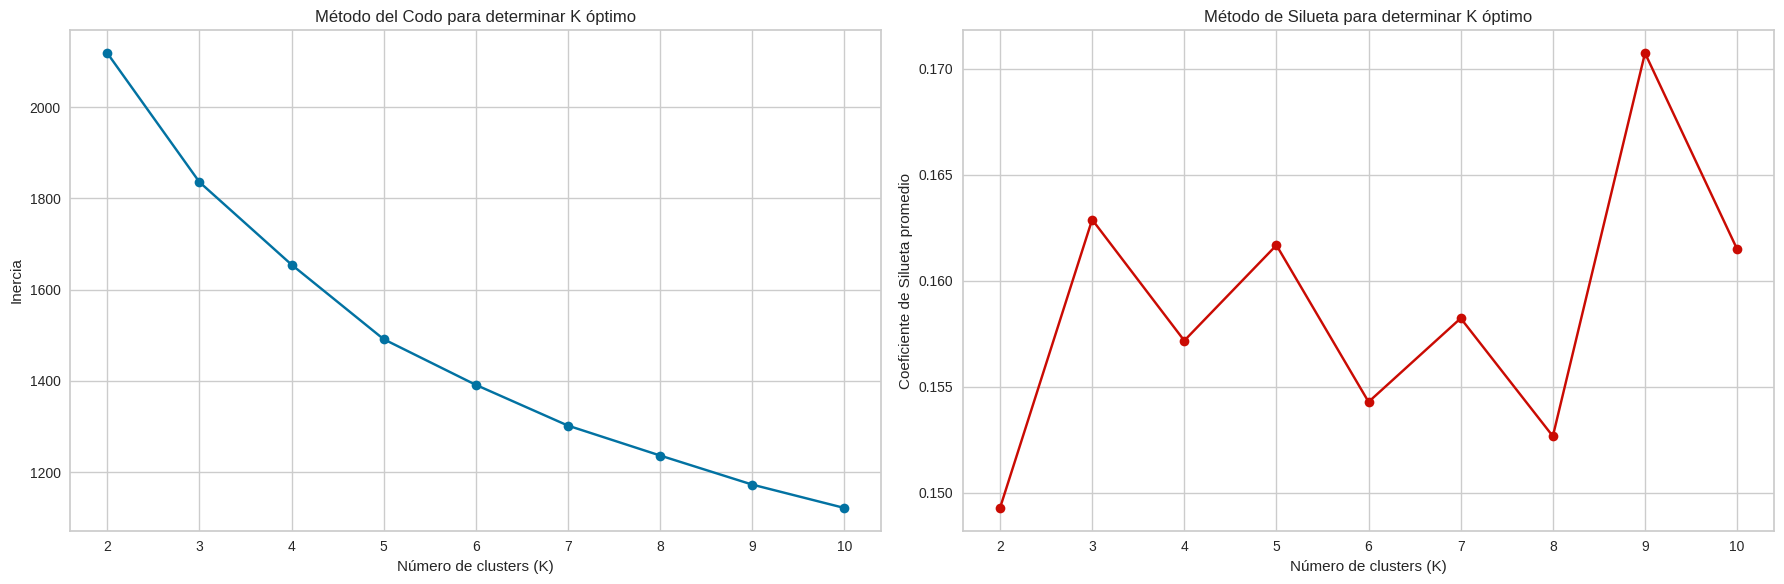


Usando KElbowVisualizer para confirmar K óptimo...


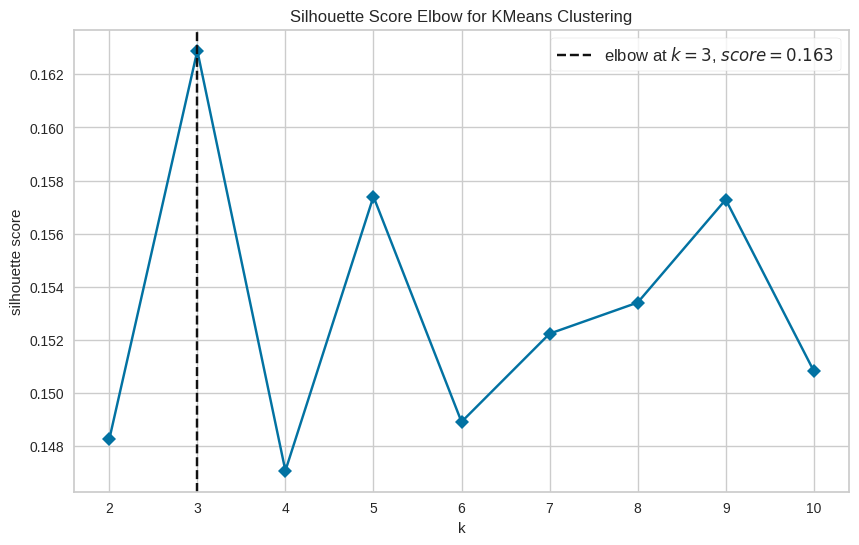


Valor óptimo de K seleccionado: 4


In [5]:

# 3. Determinación del número óptimo de clusters (K) mediante varios métodos
print("\nPaso 2: Determinación del número óptimo de clusters (K)")

# 3.1. Método del codo (Elbow Method)
print("Aplicando el método del codo (Elbow Method)...")
inertias = []
sil_scores = []
range_k = range(2, 11)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# Calculamos inercia y coeficiente de silueta para diferentes valores de K
for k in range_k:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    inertias.append(kmeans.inertia_)

    # Calculamos el coeficiente de silueta
    if k > 1:  # Para k=1 no se puede calcular el coeficiente de silueta
        sil_score = silhouette_score(data_scaled, kmeans.labels_)
        sil_scores.append(sil_score)
        print(f"K = {k}, Coeficiente de silueta = {sil_score:.4f}")

# Graficar el método del codo
ax1.plot(range_k, inertias, 'bo-')
ax1.set_xlabel('Número de clusters (K)')
ax1.set_ylabel('Inercia')
ax1.set_title('Método del Codo para determinar K óptimo')
ax1.grid(True)

# Graficar el método de silueta
ax2.plot(range(2, 11), sil_scores, 'ro-')
ax2.set_xlabel('Número de clusters (K)')
ax2.set_ylabel('Coeficiente de Silueta promedio')
ax2.set_title('Método de Silueta para determinar K óptimo')
ax2.grid(True)

plt.tight_layout()
plt.show()

# 3.2. Visualizador de codo con Yellowbrick (alternativa más avanzada)
print("\nUsando KElbowVisualizer para confirmar K óptimo...")
fig, ax = plt.subplots(figsize=(10, 6))
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 11), metric='silhouette', timings=False, ax=ax)
visualizer.fit(data_scaled)
visualizer.show()

# Seleccionamos el valor óptimo de K basado en los métodos anteriores
# (Este valor puede variar dependiendo de los datos generados aleatoriamente)
k_optimo = 4  # Ajustar según los resultados de los gráficos
print(f"\nValor óptimo de K seleccionado: {k_optimo}")



In [6]:
# 4. Entrenamiento del modelo K-means con el K óptimo
print(f"\nPaso 3: Entrenamiento del modelo K-means con K = {k_optimo}")
kmeans_final = KMeans(n_clusters=k_optimo, random_state=42, n_init=10)
kmeans_final.fit(data_scaled)
labels = kmeans_final.labels_

# Añadimos las etiquetas al DataFrame original
data['Cluster'] = labels
print("\nDistribución de clientes por cluster:")
print(data['Cluster'].value_counts())




Paso 3: Entrenamiento del modelo K-means con K = 4

Distribución de clientes por cluster:
Cluster
1    168
0    139
2    114
3     79
Name: count, dtype: int64



Paso 4: Análisis de siluetas


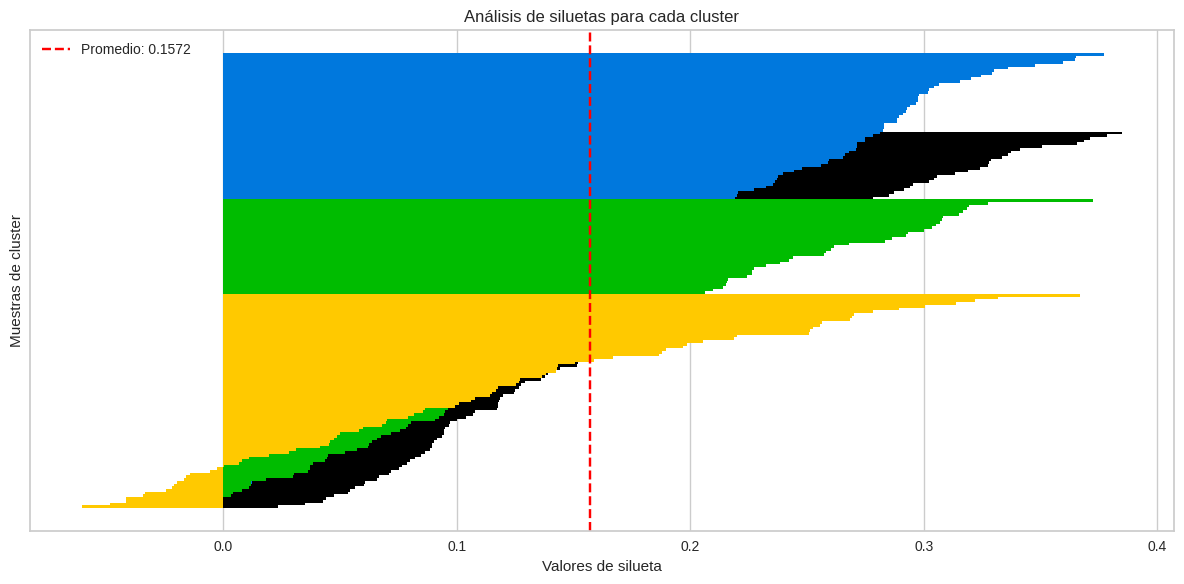

Coeficiente de silueta promedio: 0.1572

Valores de silueta promedio por cluster:
Cluster 0: 0.1863
Cluster 1: 0.1585
Cluster 2: 0.1501
Cluster 3: 0.1134


In [7]:
# 5. Análisis de siluetas
print("\nPaso 4: Análisis de siluetas")
silhouette_values = silhouette_samples(data_scaled, labels)
data['Silhouette'] = silhouette_values

# Visualización de siluetas por cluster
plt.figure(figsize=(12, 6))
for cluster in range(k_optimo):
    cluster_silhouette_values = silhouette_values[labels == cluster]
    y_ticks = np.arange(0, len(cluster_silhouette_values), 1)

    # Ordenar los valores de silueta dentro de cada cluster
    cluster_silhouette_values.sort()

    color = cm.nipy_spectral(float(cluster) / k_optimo)
    plt.barh(y_ticks, cluster_silhouette_values, height=1.0, edgecolor='none', color=color)

    # Ajustar los ticks del eje y para que no se superpongan
    if cluster > 0:
        y_ticks = y_ticks + len(silhouette_values[labels == (cluster-1)])

plt.axvline(x=silhouette_score(data_scaled, labels), color="red", linestyle="--",
           label=f'Promedio: {silhouette_score(data_scaled, labels):.4f}')
plt.yticks([])
plt.xlabel("Valores de silueta")
plt.ylabel("Muestras de cluster")
plt.legend(loc="best")
plt.title("Análisis de siluetas para cada cluster")
plt.tight_layout()
plt.show()

print(f"Coeficiente de silueta promedio: {silhouette_score(data_scaled, labels):.4f}")
print("\nValores de silueta promedio por cluster:")
for i in range(k_optimo):
    print(f"Cluster {i}: {data[data['Cluster'] == i]['Silhouette'].mean():.4f}")



¿Qué elegirías: un K con silueta más alta o menor inercia? ¿Por qué?.

¿Qué ocurre si seleccionas K=2 y K=8? ¿Cómo cambia la silueta promedio?

In [10]:
# 6. Análisis descriptivo de los clusters
print("\nPaso 5: Análisis descriptivo de los clusters")
# Estadísticas por cluster
cluster_stats = data.groupby('Cluster').mean()
print("\nValores medios de cada variable por cluster:")
print(cluster_stats)




Paso 5: Análisis descriptivo de los clusters

Valores medios de cada variable por cluster:
              Edad  Ingreso_Anual  Gasto_Mensual  Frecuencia_Compra  \
Cluster                                                               
0        31.418875   58984.327823     593.920678           2.669065   
1        41.302221   42305.339248     397.155376           3.940476   
2        48.302008   52797.730202     657.474447           1.894737   
3        40.781826   49539.697138     463.535298           3.151899   

         Antiguedad_Cliente  Silhouette  
Cluster                                  
0                  3.035286    0.186327  
1                  2.885523    0.158452  
2                  3.714766    0.150076  
3                  9.469187    0.113381  


¿Qué pasa si vuelves a correr el modelo con un random_state diferente? ¿Por qué cambia?

¿Cuántos clientes hay en el cluster más grande? ¿Qué implicaciones tiene para campañas de marketing?


Paso 6: Visualización de los clusters


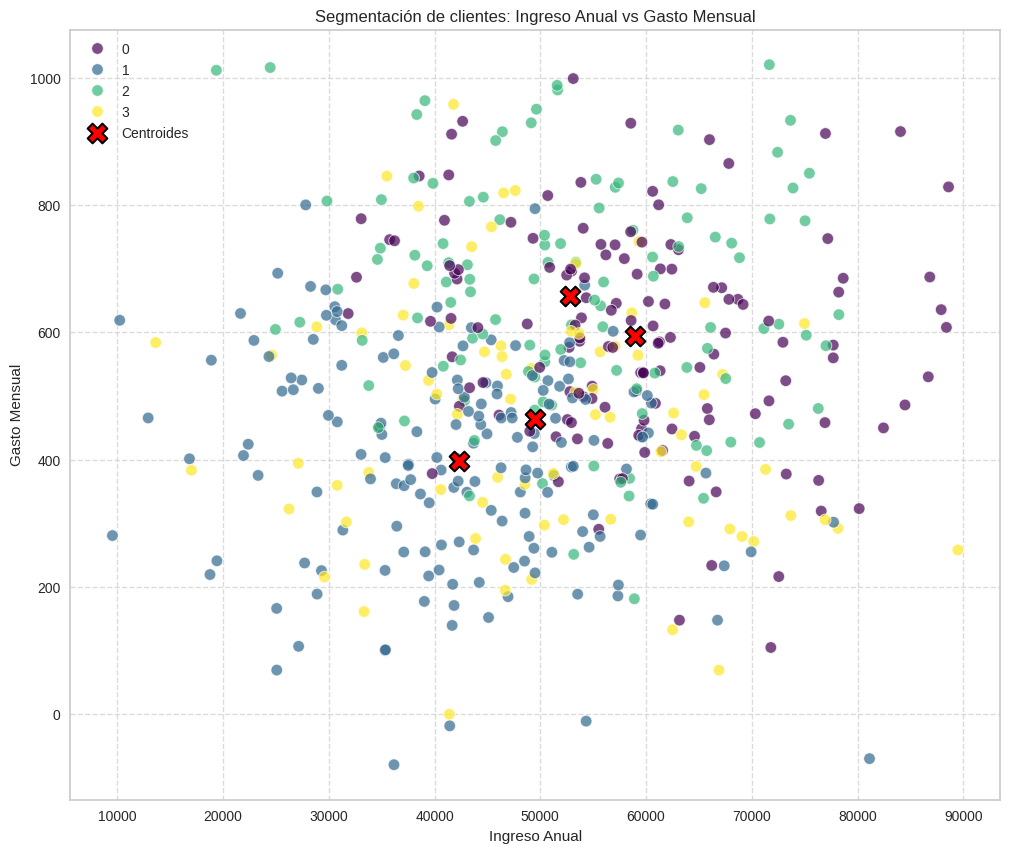

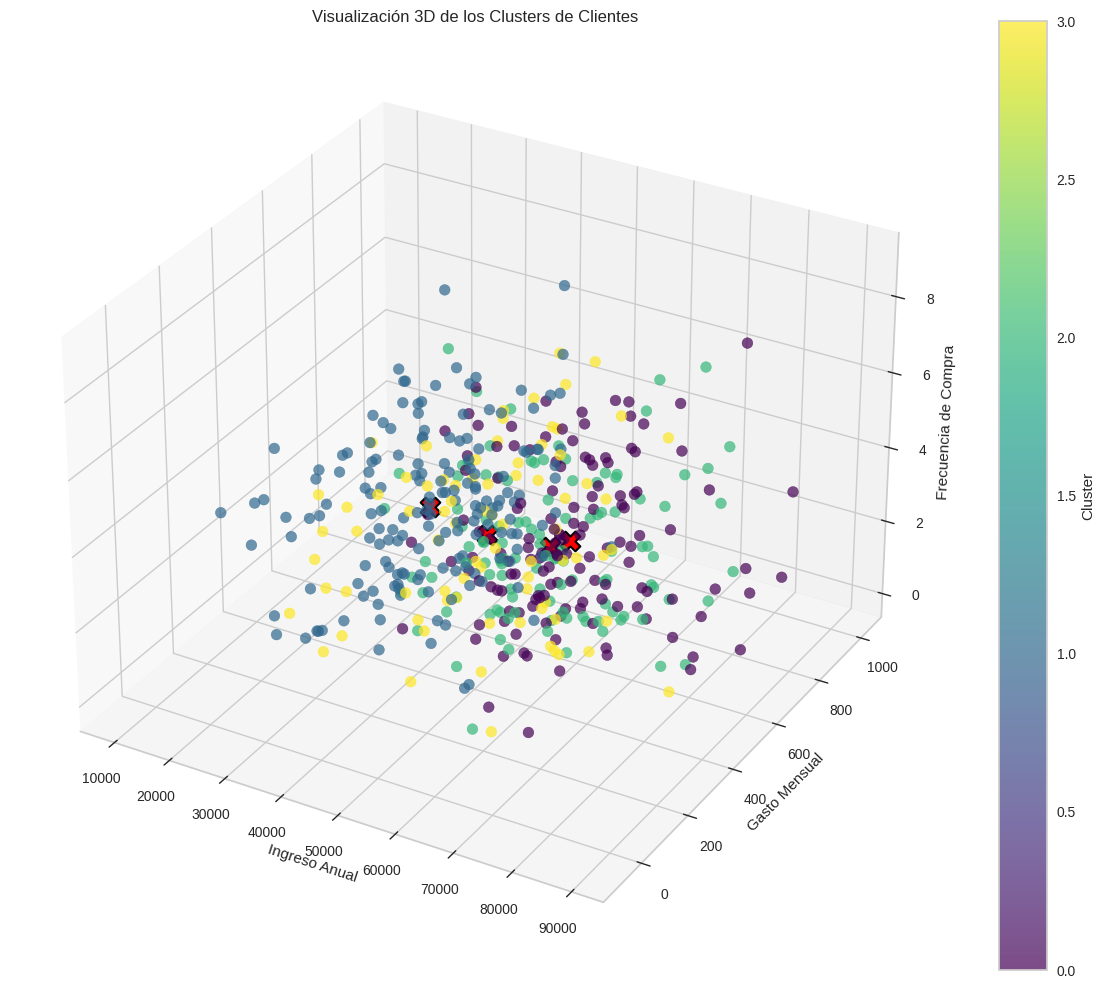

In [12]:
# 7. Visualización de los clusters
print("\nPaso 6: Visualización de los clusters")

# 7.1. Visualización 2D de pares de variables importantes
plt.figure(figsize=(12, 10))
sns.scatterplot(x='Ingreso_Anual', y='Gasto_Mensual', hue='Cluster',
                palette='viridis', data=data, s=70, alpha=0.7)
plt.title('Segmentación de clientes: Ingreso Anual vs Gasto Mensual')
plt.xlabel('Ingreso Anual')
plt.ylabel('Gasto Mensual')
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir los centroides al gráfico (transformados de vuelta a la escala original)
centroids = scaler.inverse_transform(kmeans_final.cluster_centers_)
for i in range(k_optimo):
    plt.scatter(centroids[i, 1], centroids[i, 2], s=200, c='red', marker='X',
                edgecolor='black', linewidth=1.5, label='Centroides' if i == 0 else "")
plt.legend()
plt.show()

# 7.2. Visualización 3D con las tres variables más importantes
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Seleccionamos tres variables para visualización
scatter = ax.scatter(data['Ingreso_Anual'], data['Gasto_Mensual'],
                    data['Frecuencia_Compra'], c=data['Cluster'],
                    cmap='viridis', s=60, alpha=0.7)

# Añadir los centroides al gráfico 3D
for i in range(k_optimo):
    ax.scatter(centroids[i, 1], centroids[i, 2], centroids[i, 3],
              s=200, c='red', marker='X', edgecolor='black', linewidth=1.5)

ax.set_xlabel('Ingreso Anual')
ax.set_ylabel('Gasto Mensual')
ax.set_zlabel('Frecuencia de Compra')
ax.set_title('Visualización 3D de los Clusters de Clientes')
plt.colorbar(scatter, ax=ax, label='Cluster')
plt.tight_layout()
plt.show()



¿Qué par de variables permite ver mejor la separación entre grupos? ¿Cuál es la peor?

 En la visualización 3D, ¿algún cluster parece solaparse con otro? ¿Qué harías al respecto?


Paso 7: Visualización de radar chart para perfiles de clusters


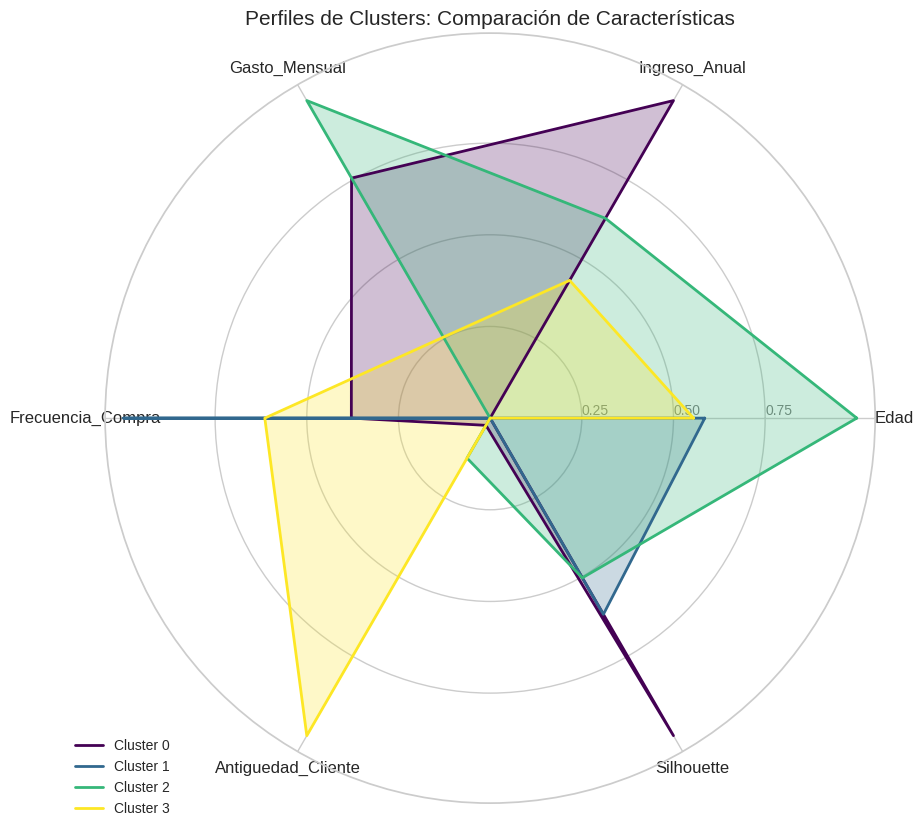

In [13]:
# 8. Visualización de radar chart para comparar perfiles de clusters
print("\nPaso 7: Visualización de radar chart para perfiles de clusters")

# Normalizar los datos para el radar chart
radar_df = cluster_stats.copy()
for col in radar_df.columns:
    radar_df[col] = (radar_df[col] - radar_df[col].min()) / (radar_df[col].max() - radar_df[col].min())

# Configuración del radar chart
categories = list(radar_df.columns)
N = len(categories)
angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]  # Cerrar el círculo

# Crear figura
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(polar=True))

# Dibujar para cada cluster
colors = plt.cm.viridis(np.linspace(0, 1, k_optimo))
for i, (idx, row) in enumerate(radar_df.iterrows()):
    values = row.values.tolist()
    values += values[:1]  # Cerrar el círculo
    ax.plot(angles, values, linewidth=2, linestyle='solid', color=colors[i], label=f'Cluster {idx}')
    ax.fill(angles, values, color=colors[i], alpha=0.25)

# Configurar el radar chart
plt.xticks(angles[:-1], categories, size=12)
ax.set_rlabel_position(0)
plt.yticks([0.25, 0.5, 0.75], ["0.25", "0.50", "0.75"], size=10, color="grey")
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
plt.title('Perfiles de Clusters: Comparación de Características', size=15)
plt.show()



¿Qué cluster tiene el perfil más equilibrado? ¿Cuál es más extremo?

In [14]:
# 9. Interpretación de los clusters para marketing
print("\nPaso 8: Interpretación de los clusters para marketing")
print("\nInterpretación de los segmentos de clientes para estrategias de marketing:")

# Esta parte puede automatizarse parcialmente, pero la interpretación final requiere
# conocimiento del dominio. Aquí mostramos un ejemplo:

for i in range(k_optimo):
    print(f"\nCluster {i}:")
    print(f"- Tamaño: {sum(data['Cluster'] == i)} clientes ({sum(data['Cluster'] == i)/len(data)*100:.1f}%)")
    print(f"- Edad promedio: {data[data['Cluster'] == i]['Edad'].mean():.1f} años")
    print(f"- Ingreso anual promedio: ${data[data['Cluster'] == i]['Ingreso_Anual'].mean():.2f}")
    print(f"- Gasto mensual promedio: ${data[data['Cluster'] == i]['Gasto_Mensual'].mean():.2f}")
    print(f"- Frecuencia de compra: {data[data['Cluster'] == i]['Frecuencia_Compra'].mean():.1f} veces/mes")
    print(f"- Antigüedad como cliente: {data[data['Cluster'] == i]['Antiguedad_Cliente'].mean():.1f} años")
    print(f"- Calidad del cluster (silueta): {data[data['Cluster'] == i]['Silhouette'].mean():.4f}")

# 10. Recomendaciones para estrategias de marketing por segmento
print("\nPaso 9: Recomendaciones para estrategias de marketing por segmento")
# Aquí proporcionaríamos recomendaciones basadas en las características de cada cluster
# Ejemplo de interpretación automatizada basada en los valores relativos:

high_value_threshold = data['Gasto_Mensual'].quantile(0.75)
loyal_threshold = data['Antiguedad_Cliente'].quantile(0.75)
frequent_threshold = data['Frecuencia_Compra'].quantile(0.75)

for i in range(k_optimo):
    print(f"\nEstrategias recomendadas para Cluster {i}:")

    cluster_data = data[data['Cluster'] == i]

    if cluster_data['Gasto_Mensual'].mean() > high_value_threshold:
        print("- Clientes de alto valor: Implementar programa de fidelización premium")

    if cluster_data['Antiguedad_Cliente'].mean() > loyal_threshold:
        print("- Clientes leales: Reforzar relación con ofertas exclusivas y reconocimiento")

    if cluster_data['Frecuencia_Compra'].mean() > frequent_threshold:
        print("- Compradores frecuentes: Cross-selling y programas de recompensas")

    if (cluster_data['Gasto_Mensual'].mean() < data['Gasto_Mensual'].mean() and
        cluster_data['Frecuencia_Compra'].mean() < data['Frecuencia_Compra'].mean()):
        print("- Potencial de crecimiento: Campañas de activación y ofertas especiales")


Paso 8: Interpretación de los clusters para marketing

Interpretación de los segmentos de clientes para estrategias de marketing:

Cluster 0:
- Tamaño: 139 clientes (27.8%)
- Edad promedio: 31.4 años
- Ingreso anual promedio: $58984.33
- Gasto mensual promedio: $593.92
- Frecuencia de compra: 2.7 veces/mes
- Antigüedad como cliente: 3.0 años
- Calidad del cluster (silueta): 0.1863

Cluster 1:
- Tamaño: 168 clientes (33.6%)
- Edad promedio: 41.3 años
- Ingreso anual promedio: $42305.34
- Gasto mensual promedio: $397.16
- Frecuencia de compra: 3.9 veces/mes
- Antigüedad como cliente: 2.9 años
- Calidad del cluster (silueta): 0.1585

Cluster 2:
- Tamaño: 114 clientes (22.8%)
- Edad promedio: 48.3 años
- Ingreso anual promedio: $52797.73
- Gasto mensual promedio: $657.47
- Frecuencia de compra: 1.9 veces/mes
- Antigüedad como cliente: 3.7 años
- Calidad del cluster (silueta): 0.1501

Cluster 3:
- Tamaño: 79 clientes (15.8%)
- Edad promedio: 40.8 años
- Ingreso anual promedio: $49539.70
- 

¿Qué significa un valor negativo en el gráfico de siluetas? ¿Qué harías con esos puntos?

¿Cuál cluster tiene mayor cohesión interna según la silueta? ¿Y cuál el menor?